# 5 Stages of Summarization: From Beginner to Expert

Summarization is a vital component of many LLM tasks. In practical scenarios, you'll run into use cases where turning extensive texts into concise, meaningful points is essential.

Depending on the text's length you're addressing, various summarization techniques can be applied.

Here, we'll outline 5 distinct levels of summarization, ranging from basic to advanced. Remember, these aren't the only methods out there.

**5 Levels Of Summarization:**
Summarize a few sentences - Basic Prompt
Summarize several paragraphs - Prompt Templates
Summarize a few pages - Map Reduce
Summarize a whole book - Best Representation Vectors
Summarize text of an indeterminate length - Agents.
1. **Summarize a few sentences** - Basic Prompt 
2. **Summarize several paragraphs** - Prompt Templates 
3. **Summarize a few pages** - Map Reduce 
4. **Summarize a few pages** - Recurssive Map Reduce
5. **Summarize a whole book** - Best Representation Vectors

Stay tuned for level 6 
First, let's import our Konko API key from a .dotenv file.


In [1]:
from dotenv import load_dotenv,find_dotenv

load_dotenv(find_dotenv())

False

## Level 1: Basic Prompt - Summarize a few sentences

If you're looking to briefly summarize just a few sentences, you can simply use a direct prompt and then copy and paste your text.

**Summarizing JIRA Tickets:**

Businesses often drown in many JIRA tickets, overwhelming teams. Summarizing helps quickly grasp each ticket's essence amid the chaos. 

However, this method isn't scalable and is best suited for limited scenarios, fitting perfectly as level #1!

In [1]:
from langchain.chat_models import ChatKonko
from langchain.schema import AIMessage, HumanMessage, SystemMessage

In [2]:
llm = ChatKonko(model='meta-llama/Llama-2-70b-chat-hf', max_tokens = 1000)

The crucial step is giving clear directions to the LLM, guiding its action. Here, I'm instructing the model to produce a summary of the following Jira Ticket.

In [3]:
messages = [
    SystemMessage(
        content="You are a helpful assistant."
    ),
    HumanMessage(
        content="""
                    Could you, in your eloquent way, condense this ticket's story for us?

                    Ticket Content:
                    Ticket ID: JIRA-78901
                    Title: Implement Dynamic Cache Refresh Mechanism
                    Reporter: Alex Thompson
                    Assigned to: Jamie Cortez
                    Status: Open
                    Priority: High
                    Description:
                    Over the past few months, our XYZ product's analytics has shown a 25% decrease in response time, especially during peak usage hours. Analysis attributes this to cache bottlenecks, which are affecting user satisfaction scores and leading to an uptick in support tickets. This ticket proposes the development of a dynamic cache refresh mechanism. The intent is to have a smarter cache system that intelligently adjusts refresh rates based on real-time traffic loads and query complexities. By doing so, we aim to enhance server responsiveness, ensuring users have a seamless experience. This mechanism should also provide admin users with an interface to set manual overrides if needed. It's imperative that this solution seamlessly integrates with our current Redis setup and be scalable for future growth.

                    Dependencies:

                    Completion of ticket JIRA-78890 (Upgrade to Redis 7.0).
                    Integration testing with the recently introduced user analytics module.
                    Coordination with the database team and DevOps for deployment considerations.
                    Comments:
                    John Doe: Keep in mind our scheduled maintenance on the 20th. We shouldn’t have overlapping activities.
                    Lucy Green: QA team will require documentation on the new features to ensure comprehensive testing. Expecting at least 3 days for complete QA post-implementation.
                    Carlos Mendoza: Has anyone considered the impact on our mobile users? We need to ensure the changes are optimized for both desktop and mobile platforms.

"""
    ),
]


In [4]:
output = llm(messages)
print(output.content)

 Sure, here's a condensed version of the ticket's story:

The XYZ product's response time has decreased by 25% over the past few months, especially during peak hours, due to cache bottlenecks. This ticket proposes the development of a dynamic cache refresh mechanism to address the issue, which will adjust refresh rates based on real-time traffic loads and query complexities. The solution should integrate with the current Redis setup, be scalable for future growth, and provide admin users with an interface to set manual overrides if needed. The dependencies for this ticket include the completion of ticket JIRA-78890 (Upgrade to Redis 7.0), integration testing with the recently introduced user analytics module, and coordination with the database team and DevOps for deployment considerations.

Additionally, the QA team will require documentation on the new features for comprehensive testing, and the changes should be optimized for both desktop and mobile platforms. The implementation shou

**The summary, though condensed, remains detailed for quick reads. We need a shorter version focusing on key points. Let's tweak our prompt for a clearer, concise snapshot without unnecessary specifics.**

In [5]:
messages = [
    SystemMessage(
        content="You are a helpful assistant."
    ),
    HumanMessage(
        content="""
                    Could you, in your eloquent way, condense this ticket's story for us? Our tech team would love a concise summary, highlighting:
                    1. The core issue or feature being addressed.
                    2. The primary expected outcomes.
                    3. Any crucial dependencies or constraints.
                    4. The urgency or priority level.

                    Ticket Content:
                    Ticket ID: JIRA-78901
                    Title: Implement Dynamic Cache Refresh Mechanism
                    Status: Open
                    Priority: High
                    Description:
                    Over the past few months, our XYZ product's analytics has shown a 25% decrease in response time, especially during peak usage hours. Analysis attributes this to cache bottlenecks, which are affecting user satisfaction scores and leading to an uptick in support tickets. This ticket proposes the development of a dynamic cache refresh mechanism. The intent is to have a smarter cache system that intelligently adjusts refresh rates based on real-time traffic loads and query complexities. By doing so, we aim to enhance server responsiveness, ensuring users have a seamless experience. This mechanism should also provide admin users with an interface to set manual overrides if needed. It's imperative that this solution seamlessly integrates with our current Redis setup and be scalable for future growth.

                    Dependencies:

                    Completion of ticket JIRA-78890 (Upgrade to Redis 7.0).
                    Integration testing with the recently introduced user analytics module.
                    Coordination with the database team and DevOps for deployment considerations.
                    Comments:
                    John Doe: Keep in mind our scheduled maintenance on the 20th. We shouldn’t have overlapping activities.
                    Lucy Green: QA team will require documentation on the new features to ensure comprehensive testing. Expecting at least 3 days for complete QA post-implementation.
                    Carlos Mendoza: Has anyone considered the impact on our mobile users? We need to ensure the changes are optimized for both desktop and mobile platforms.

"""
    ),
]


In [6]:
output = llm(messages)
print(output.content)

 Sure, here's a concise summary of the ticket's story:

1. Core issue/feature: Implement a dynamic cache refresh mechanism to address cache bottlenecks, reduce response time, and improve user satisfaction.
2. Primary expected outcomes: Enhanced server responsiveness, seamless user experience, and an admin interface for manual overrides.
3. Crucial dependencies/constraints:
	* Completion of ticket JIRA-78890 (Upgrade to Redis 7.0)
	* Integration testing with the recently introduced user analytics module
	* Coordination with the database team and DevOps for deployment considerations
	* Consideration of impact on mobile users
4. Urgency/priority level: High priority, as the issue is affecting user satisfaction and leading to an increase in support tickets.

I hope this summary helps your tech team understand the key aspects of the ticket!


Nice! That's much better, but let's look at something we can automate a bit more

## Level 2: Prompt Templates - Summarize a few paragraphs

Prompt templates are an effective method to dynamically insert specific text segments into your prompts. Think of them as akin to [Python f-strings](https://realpython.com/python-f-strings/), but tailored for seamless integration with language models.

Let's delve into 2 short business documents: one about a **staff training memo** (representing "Training and Onboarding") and the other concerning a **yearly financial report** (representing "Investor Relations").

While we have demonstrated the utility with these two specific scenarios, the potential applications are vast. For instance:

1. **Customer Support:** Extract key issues from feedback to enhance product or service offerings.
2. **Executive Briefings:** Create concise summaries for top decision-makers to grasp essential details without wading through extensive reports.
3. **Product Reviews:** Summarize feedback on new product launches to quickly gauge customer sentiment and identify areas for improvement.
4. **Market Research:** Collate insights about the latest industry trends and competitor activities in a brief format for strategic planning.

By understanding the context and objectives, users can modify and tailor these templates to suit a wide array of business needs.


In [7]:
from langchain import PromptTemplate
import os

In [8]:
paul_graham_essays = ['../data/memo/Onboarding_doc.txt', '../data/memo/Investor_relations.txt']

essays = []

for file_name in paul_graham_essays:
    with open(file_name, 'r') as file:
        essays.append(file.read())

Let's print out a preview of the essays to see what they look like

In [9]:
for i, essay in enumerate(essays):
    print (f"Essay #{i+1}: {essay[:300]}\n")

Essay #1: Training and Onboarding

Our onboarding program for the Design Department has been formulated with extensive research and insights from current and past employees. The first week is dedicated to understanding the company’s history, mission, vision, and core values. We ensure this through a series of

Essay #2: Investor relations report

In the annual overview for 2022, XYZ has shown remarkable resilience and growth despite the challenges posed by the global landscape. Beginning with our achievements, XYZ's revenue surged by 25%, outpacing our closest competitors. This impressive growth can be attributed t



Next let's create a prompt template which will hold our instructions and a placeholder for the essay. In this illustration, we'll focus on extracting the core details, accomplishments, hurdles, and forthcoming plans or tactics.

In [10]:
template = """
Summarize the key achievements, main challenges faced, and any forward-looking strategies or 
initiatives mentioned in the document.

{essay}
"""

prompt = PromptTemplate(
    input_variables=["essay"],
    template=template
)

Then let's loop through the 2 essays and pass them to our LLM. I'm applying .strip() on the summaries to remove the white space on the front and back of the output

In [11]:
for essay in essays:
    summary_prompt = prompt.format(essay=essay)
    num_tokens = llm.get_num_tokens(summary_prompt)
    print (f"This prompt + essay has {num_tokens} tokens")
    messages = [
        SystemMessage(
            content="You are a helpful assistant."
        ),
        HumanMessage(
            content=summary_prompt
        ),
    ]
    summary = llm(messages)
    
    print (f"Summary: {summary.content}")
    print ("\n")

This prompt + essay has 395 tokens


Summary:  The document describes the training and onboarding program for the Design Department at a company. The program lasts for four weeks and covers various topics, including company history, mission, and values, department-specific tools and practices, collaboration, and individual role-specific training. The program also includes soft skills training and feedback sessions.

Key achievements:

* The program has been formulated with extensive research and insights from current and past employees.
* New hires have expressed high satisfaction with the mentorship program and hands-on approach.
* 80% of new hires feel confident to start real projects by the end of the third week.

Main challenges:

* Some new hires have expressed a desire for more advanced workshops on emerging design tools.
* There is a suggestion to have a few sessions dedicated solely to understanding user research and integrating findings into the design.

Forward-looking strategies/initiatives:

* None mentioned i

## Level 3: Map Reduce - Summarize a few pages 

**Why Summarize?**
Summarizing large reports, like the "Market report of The individual health insurance market in 2023," provides quick insights for businesses. It aids in:

1. Faster decision-making.
2. Clear stakeholder communication.
3. Efficient meeting preparations.
4. Sharing insights across teams.


If you have multiple pages you'd like to summarize, you'll likely run into a token limit. Token limits won't always be a problem, but it is good to know how to handle them if you run into the issue.

The chain type "Map Reduce" is a method that helps with this. You first generate a summary of smaller chunks (that fit within the token limit) and then you get a summary of the summaries.

Check out [this video](https://www.youtube.com/watch?v=f9_BWhCI4Zo) for more information on how chain types work


In [12]:
from langchain.chains.summarize import load_summarize_chain
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [24]:
market_essay = '../data/MarketReport_healthInsurance_originalVersion.txt'

with open(market_essay, 'r') as file:
    essay = file.read()

Let's see how many tokens are in this essay

In [25]:
llm.get_num_tokens(essay)

2587

That's too many, let's split our text up into chunks so they fit into the prompt limit. I'm going a chunk size of 8,000 characters. 

> You can think of tokens as pieces of words used for natural language processing. For English text, **1 token is approximately 4 characters** or 0.75 words. As a point of reference, the collected works of Shakespeare are about 900,000 words or 1.2M tokens.

This means the number of tokens we should expect is 8000 / 4 = ~ 2000 token chunks. But this will vary, each body of text/code will be different

In [26]:
text_splitter = RecursiveCharacterTextSplitter(separators=["\n\n", "\n"], chunk_size=8000, chunk_overlap=300)

docs = text_splitter.create_documents([essay])

In [27]:
num_docs = len(docs)

num_tokens_first_doc = llm.get_num_tokens(docs[0].page_content)

print (f"Now we have {num_docs} documents and the first one has {num_tokens_first_doc} tokens")

Now we have 2 documents and the first one has 1621 tokens


Great, assuming that number of tokens is consistent in the other docs we should be good to go. Let's use LangChain's [load_summarize_chain](https://python.langchain.com/en/latest/use_cases/summarization.html) to do the `map_reducing` for us. We first need to initialize our chain

**Determine Your Output Format**

Want a bullet-point summary? Tailor your prompts accordingly. By using custom prompts, you can instruct the model with precision.

Here's a peek into setting up those prompts:

**Map Prompt:** This will remain consistent for mapping. The goal? To achieve a concise summary.

In [28]:
map_prompt = """
Write a concise summary of the following:
"{text}"
CONCISE SUMMARY:
"""
map_prompt_template = PromptTemplate(template=map_prompt, input_variables=["text"])

**Combine Prompt:** This is where the magic of combining happens. For our goal, we want to refine and compile our mapped summaries into bullet points.

In [29]:
combine_prompt = """
Write a concise summary of the following text delimited by triple backquotes.
Return your response in bullet points which covers the key points of the text.
```{text}```
BULLET POINT SUMMARY:
"""
combine_prompt_template = PromptTemplate(template=combine_prompt, input_variables=["text"])

In [30]:
summary_chain = load_summarize_chain(llm=llm,
                                     chain_type='map_reduce',
                                     map_prompt=map_prompt_template,
                                     combine_prompt=combine_prompt_template
                                    )

In [31]:
output = summary_chain.run(docs)

**Here is the summary**

In [32]:
print(output)

 * In 2023, the individual health insurance market has seen significant growth, with over 3.6 million new consumers entering the market.
* Insurer participation has continued to grow, with national insurers expanding their participation the most.
* Consumers have more choices in product offerings, with insurers offering 17% more plan options in 2023 than in 2022.
* Premiums have increased modestly, with a median increase of 4% for the lowest-price silver plan.
* The proportion of counties with a single insurer has decreased, and the number of plans available to consumers has increased.
* Premiums have increased across all metal tiers and plan categories, with the highest increases for platinum and catastrophic plans.
* National insurers have improved their price position in 2023, offering the lowest premiums for silver plans for 20% of consumers.
* Insurtechs have seen a decrease in price leadership.
* Medicaid and Blues plans maintain the highest proportion of price leadership, offeri

## Level 4: Summarize a few pages - Recurssive Map Reduce

While the above summarization technique appears effective, it's essential to recognize some inherent challenges. Below, we outline these issues and propose solutions.



**Current Challenge:**

LangChain's 'Map Reduce' breaks down and summarizes content segments. However, the issue arises during the final summarization stage, when these summarized parts are consolidated, particularly for lengthy documents. This process can often surpass the token limit.

We're now delving into a custom approach for iterative summarization. While our method offers benefits, it's important to highlight its inherent constraints, which we'll discuss further.

In [33]:
import math
from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
)

MAX_TOKENS_SUMMARY = 1000
SUMMARY_SYS_MSG = """Write a concise summary of the following:
"{input}"
CONCISE SUMMARY:"""

FINAL_SUMMARY_SYS_MSG = """
Write a concise summary of the following text delimited by triple backquotes.
Return your response in bullet points which covers the key points of the text.
```{input}```
BULLET POINT SUMMARY:
"""


def token_len(input: str) -> int:
    """Get token length"""
    return llm.get_num_tokens(input)

def chunk(input: str) -> list:
    input_tokens = token_len(input)
    count = math.ceil(input_tokens / MAX_TOKENS_SUMMARY)
    k, m = divmod(len(input), count)
    chunks = [
        input[i * k + min(i, m) : (i + 1) * k + min(i + 1, m)] for i in range(count)
    ]
    return chunks

def summarize(input: str, final: bool = False) -> str:
    if token_len(input) <= MAX_TOKENS_SUMMARY:
        final = True  # Force bullet points if within token limit

    # Use appropriate system message based on final flag
    system_message = SystemMessagePromptTemplate.from_template(
        template=FINAL_SUMMARY_SYS_MSG if final else SUMMARY_SYS_MSG
    )
    human_message = HumanMessagePromptTemplate.from_template(
        template="Input: {input}"
    )

    if final:  # Directly summarize with bullet points if final flag is set
        prompt = ChatPromptTemplate(
            input_variables=["input"],
            messages=[system_message, human_message],
        )
        _input = prompt.format_prompt(input=input)
        single_string_prompt = (_input.to_messages()[0].content)
        single_string_prompt = [
                                    SystemMessage(
                                        content="You are a helpful assistant."
                                    ),
                                    HumanMessage(
                                        content=single_string_prompt
                                    ),
                                ]
        output = llm(single_string_prompt)
        return output

    # If not 'final', proceed with chunk-wise summarization
    chunks = chunk(input=input)
    summary = ""

    for i in chunks:
        prompt = ChatPromptTemplate(
            input_variables=["input"],
            messages=[system_message, human_message],
        )

        _input = prompt.format_prompt(input=i)
        single_string_prompt = (_input.to_messages()[0].content)
        single_string_prompt = [
                                    SystemMessage(
                                        content="You are a helpful assistant."
                                    ),
                                    HumanMessage(
                                        content=single_string_prompt
                                    ),
                                ]
        output = llm(single_string_prompt)
        summary += f"\n{output}"

    # Check token length of the summary and decide next step
    sum_tokens = token_len(input=summary)

    if sum_tokens > MAX_TOKENS_SUMMARY:
        return summarize(input=summary, final=True)  # Recur with 'final' set to True

    return summarize(input=summary, final=True)

In [34]:
market_essay = '../data/MarketReport_healthInsurance_shortVersion.txt'

with open(market_essay, 'r') as file:
    essay = file.read()

Let's see how many tokens are in this essay

In [35]:
llm.get_num_tokens(essay)

6196

**Let's examine the summary generated by our tailored method.**

In [36]:
output = summarize(essay)

In [37]:
print(output.content)

 * The Federal Insurance Office (FIO) within the US Department of the Treasury has released its annual report, detailing its activities and efforts to promote consumer protection and maintain insurance industry stability.
* The report highlights FIO's contributions to the Financial Stability Oversight Council (FSOC) and its work on climate-related financial risks.
* FIO has been engaged in various international forums, such as the Joint Committee under the U.S.-EU Covered Agreement and the Sustainable Insurance Forum (SIF).
* FIO has requested information on climate-related risks and the insurance sector and has proposed revisions to the annual TRIP data call to improve its evaluation of cyber insurance.
* FIO has been actively engaging with various stakeholders, including organizations, affiliates, members, supporters, and individuals, to gather input on climate-related financial risks in the insurance sector.
* FIO has also been working on modernizing and reorganizing surety regulati

Looks good!

## Level 5: Best Representation Vectors - Summarize an entire book

As we navigate the intricacies of document summarization, it's evident that traditional methods, though robust in many scenarios, possess specific challenges. Let's briefly revisit these:

1. Recursive Summarization:

    **Function:** It partitions lengthy documents into digestible sections, which are individually summarized. These summaries are then amalgamated and further refined, iterating until a concise version surfaces.

    **Shortcomings:**
        1. Interrupted Logical Flow: Certain tools, such as LangChain, might split content without preserving its natural continuity.
        2. Inconsistent Point Emphasis: The varied lengths of distinct points by authors can result in pivotal information being cut short or inadequately summarized.
        
    
2. The 'Refine' Method:

    **Function:** It incrementally improves summaries as more content is processed.

    **Shortcomings:**
        1. Inefficiency: Unlike recursive methods which leverage logarithmic time, this method proceeds linearly.
        2. Bias Towards Initial Content: Preliminary segments may disproportionately influence the summary, even if they're unrelated to the main content.
    
Despite advances in language models, it's clear that some level of document segmentation and recursive summarization will always be necessary, especially for voluminous texts.

In the upcoming section, we'll introduce an approach that seeks to address these challenges, ensuring coherent and meaningful summaries.

We will be distilling expansive documents like "The Economic Potential of Generative AI."



In [38]:
from langchain.document_loaders import PyPDFLoader

# Load the book
loader = PyPDFLoader("../data/the-economic-potential-of-generative-ai-the-next-productivity-frontier-vf.pdf")
pages = loader.load()

# Combine the pages, and replace the tabs with spaces
text = ""

for page in pages:
    text += page.page_content
    
text = text.replace('\t', ' ')

In [39]:
num_tokens = llm.get_num_tokens(text)

print (f"This book has {num_tokens} tokens in it")

This book has 31463 tokens in it


Handling a vast 33K tokens exceeds even GPT's 32K capacity, and with a cost of $1.00 for the prompt, we need an efficient approach. 

**Objective**: Distill the book's essence through strategic chunking.

- **Chunk & Embed**: Divide the book into significant sections and transform them into vectors using embeddings.
  
- **Diversify**: Opt for a blend of chunks providing both a holistic and varied book perspective. Consider: Which 10 passages best encapsulate the book's essence?
  
- **Clustering & Selection**: Group similar vectors, pinpointing the ones that most exemplify each cluster, and subsequently summarize these selected portions.
  
- **End Goal**: Create a compelling summary that, while potentially losing some detail, captures the primary content.

Remember, this is a tailored approach, not the definitive solution. And yes, summarizing an entire book always entails some loss of detail!


In [40]:
from langchain.schema import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter


from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.chains.summarize import load_summarize_chain


import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

import numpy as np
from sklearn.cluster import KMeans

In [41]:
text_splitter = RecursiveCharacterTextSplitter(separators=["\n\n", "\n", "\t"], chunk_size=8000, chunk_overlap=800)

docs = text_splitter.create_documents([text])

In [42]:
num_documents = len(docs)

print (f"Now our book is split up into {num_documents} documents")

Now our book is split up into 23 documents


Let's get our embeddings of those 26 documents

In [43]:
embeddings = HuggingFaceEmbeddings()

vectors = embeddings.embed_documents([x.page_content for x in docs])

Now let's cluster our embeddings. There are a ton of clustering algorithms you can chose from. Please try a few out to see what works best for you!

In [44]:
# Assuming 'embeddings' is a list or array of 768-dimensional embeddings

# Choose the number of clusters, this can be adjusted based on the book's content.
# I played around and found ~4 was the best.
num_clusters = 5

# Perform K-means clustering
vectors_array = np.array(vectors)
print(vectors_array.shape)
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(vectors_array)


(23, 768)


/Users/shivanimodi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The identified clusters offer an intriguing glimpse into the book's progression. As the narrative evolves, we can anticipate shifts in the clusters, reflecting the varying semantic contexts.

In [45]:
kmeans.labels_

array([0, 0, 1, 0, 3, 3, 2, 0, 3, 3, 0, 1, 1, 1, 1, 0, 1, 0, 4, 4, 1, 1,
       0], dtype=int32)

This is neat, but in any clustering task, visualizing them is quite compelling. Don't forget to incorporate colors.

Additionally, we should perform dimensionality reduction to bring down the vectors from 768 dimensions to just 2. While this approach isn't rigorous data science, it aligns with our goal of achieving an 80% solution.

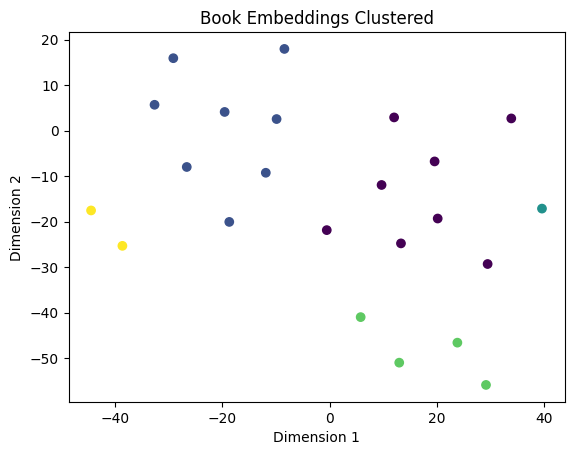

In [46]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


import warnings
from warnings import simplefilter
import numpy as np


simplefilter(action='ignore', category=FutureWarning)

# Perform t-SNE and reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=42, perplexity=10)
vectors = np.array(vectors)
reduced_data_tsne = tsne.fit_transform(vectors)

# Plot the reduced data
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=kmeans.labels_)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Book Embeddings Clustered')
plt.show()

Next, we should identify the vectors nearest to the cluster centroids (the central point).

Below is a function that accomplishes this efficiently.

In [47]:
# Determine the embeddings closest to the centroids

# Initialize a list to store indices of nearest points
closest_indices = []

# Iterate over all clusters
for i in range(num_clusters):
    
    # Calculate distances from the current cluster's center
    distances = np.linalg.norm(vectors - kmeans.cluster_centers_[i], axis=1)
    
    # Identify the index of the minimum distance (closest point)
    closest_index = np.argmin(distances)
    
    # Store the identified index in the list
    closest_indices.append(closest_index)


Now, arrange them in sequence (to ensure chunks are processed sequentially).

In [48]:
selected_indices = sorted(closest_indices)
selected_indices

[0, 5, 6, 11, 18]

It's intersting to see which chunks pop up at most descriptive. 

Let's create our custom prompts.

In [49]:
map_prompt = """
You will be given a single passage of a book. This section will be enclosed in triple backticks (```)
Your goal is to give a concise summary of this section so that a reader will have a full understanding of what happened.
Your response should be at least three paragraphs and fully encompass what was said in the passage.

```{text}```
Concise SUMMARY:
"""
map_prompt_template = PromptTemplate(template=map_prompt, input_variables=["text"])

**In this example I will do the map reduce manually**

In [50]:
map_chain = load_summarize_chain(llm=llm,
                             chain_type="stuff",
                             prompt=map_prompt_template)

Then go get your docs which the top vectors represented.

In [51]:
selected_docs = [docs[doc] for doc in selected_indices]

Let's loop through our selected docs and get a good summary for each chunk. We'll store the summary in a list.

In [52]:
# Make an empty list to hold your summaries
summary_list = []

# Loop through a range of the lenght of your selected docs
for i, doc in enumerate(selected_docs):
    
    # Go get a summary of the chunk
    chunk_summary = map_chain.run([doc])
    
    # Append that summary to your list
    summary_list.append(chunk_summary)
    
    print (f"Summary #{i} (chunk #{selected_indices[i]}) - Preview: {chunk_summary[:250]} \n")

Summary #0 (chunk #0) - Preview:  The article discusses the economic potential of generative AI, a technology that could add trillions of dollars in value to the global economy. Generative AI has the potential to automate work activities that absorb 60-70% of employees' time, accele 

Summary #1 (chunk #5) - Preview:  This passage discusses the potential impact of generative AI on various business functions, including product discovery and search, sales, software engineering, and product R&D. Generative AI can personalize product discovery and search with multimo 

Summary #2 (chunk #6) - Preview:  This passage discusses the potential of generative AI in various industries, particularly in the field of research and development (R&D). The authors argue that generative AI has the potential to revolutionize R&D by enabling faster and more efficie 

Summary #3 (chunk #11) - Preview:  This passage discusses the potential for generative AI to accelerate technical automation and transform kno

In [53]:
# Initialize a list for storing summaries
summaries = []

# Iterate over the selected documents
for idx, document in enumerate(selected_docs):
    # Obtain a summary for the specific chunk
    summarized_chunk = map_chain.run([document])
    
    # Add the summarized chunk to the summaries list
    summaries.append(summarized_chunk)
    
    print (f"Processed Summary #{idx} (from chunk #{selected_indices[idx]}) - Snippet: {summarized_chunk[:250]} \n")

Processed Summary #0 (from chunk #0) - Snippet:  The article discusses the economic potential of generative AI, a technology that has the ability to generate new and original content, such as text, music, and digital art. The authors estimate that generative AI could add $2.6 to $4.4 trillion in v 

Processed Summary #1 (from chunk #5) - Snippet:  This passage discusses the potential of generative AI to increase productivity in various industries, including marketing, sales, software engineering, and product R&D. Generative AI can help personalize product discovery and search, improve lead de 

Processed Summary #2 (from chunk #6) - Snippet:  This passage discusses the potential of generative AI in various industries, particularly in the field of research and development (R&D). The authors argue that generative AI can significantly improve productivity in R&D by enabling the rapid genera 

Processed Summary #3 (from chunk #11) - Snippet:  This passage discusses the potential for automa

Great, now that we have our list of summaries, let's get a summary of the summaries

In [54]:
summaries = "\n".join(summaries)

# Convert it back to a document
summaries = Document(page_content=summaries)

print (f"Your total summary has {llm.get_num_tokens(summaries.page_content)} tokens")

Your total summary has 1135 tokens


In [55]:
combine_prompt = """
You will be given a series of summaries from a book. The summaries will be enclosed in triple backticks (```)
Your goal is to give a concise summary of what happened in the story.
The reader should be able to grasp what happened in the book.

```{text}```
CONCISE SUMMARY:
"""
combine_prompt_template = PromptTemplate(template=combine_prompt, input_variables=["text"])

In [56]:
reduce_chain = load_summarize_chain(llm=llm,
                             chain_type="stuff",
                             prompt=combine_prompt_template,
                                   )

In [57]:
output = reduce_chain.run([summaries])

In [58]:
print (output)

 Generative AI has the potential to significantly impact various industries and increase productivity, with an estimated value ranging from $2.6 trillion to $4.4 trillion. It can automate certain tasks, enhance productivity, and create novel product categories, leading to step changes in economic growth. The technology can also challenge existing business models and intellectual property laws.

In the field of research and development (R&D), generative AI can improve productivity by enabling the rapid generation of design options, reducing the time required for physical testing, and optimizing test cases. It can also create novel product categories, leading to step changes in economic growth.

The impact of generative AI on the labor market is significant, with highly-educated, highly-paid, white-collar occupations being most exposed to generative AI. It could increase labor productivity by 0.1% to 0.6% annually over the next ten to 20 years, depending on the difficulty level of tasks 

Wow that was a long process, but you get the gist, hopefully we'll see some library abstractions in the coming months that do this automatically for us!